In [3]:
import tensorflow as tf
from tensorflow.contrib.framework.python.ops import audio_ops

# Wav file name
wav_file = tf.placeholder(tf.string)

# Read the wav file
audio_binary = tf.read_file(wav_file)

# Decode the wav mono into a 2D tensor with time in dimension 0
# and channel along dimension 1
waveform = audio_ops.decode_wav(audio_binary, desired_channels=1)

# Compute the spectrogram
spectrogram = audio_ops.audio_spectrogram(
        waveform.audio,
        window_size=1024,
        stride=64)

# Custom brightness
brightness = tf.placeholder(tf.float32, shape=[])
mul = tf.multiply(spectrogram, brightness)

# Normalize pixels
min_const = tf.constant(255.)
minimum =  tf.minimum(mul, min_const)

# Expand dims so we get the proper shape
expand_dims = tf.expand_dims(minimum, -1)

# Resize the spectrogram to input size of the model
resize = tf.image.resize_bilinear(expand_dims, [128, 128])

# Remove the trailing dimension
squeeze = tf.squeeze(resize, 0)

# Tensorflow spectrogram has time along y axis and frequencies along x axis
# so we fix that
flip = tf.image.flip_left_right(squeeze)
transpose = tf.image.transpose_image(flip)

# Convert image to 3 channels, it's still a grayscale image however
grayscale = tf.image.grayscale_to_rgb(transpose)

# Cast to uint8 and encode as png
cast = tf.cast(grayscale, tf.uint8)
png = tf.image.encode_png(cast)

with tf.Session() as sess:
    # Run the computation graph and save the png encoded image to a file
    image = sess.run(png, feed_dict={
      wav_file: '../samples/piano-melody.wav', brightness: 100})

    with open('../samples/piano.png', 'wb') as f:
        f.write(image)


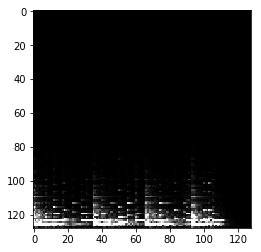

In [4]:
import skimage.io as io
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
im = io.imread('../samples/piano.png')
plt.imshow(im)